In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Question 3

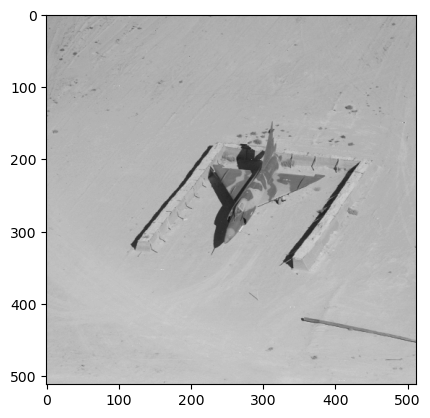

In [2]:
img_gray = plt.imread("Downloads/7.1.02.tiff")
plt.imshow(img_gray,"gray")

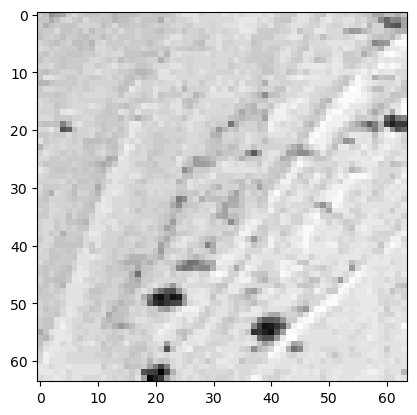

In [3]:
img_gray = img_gray[:64,:64]
plt.imshow(img_gray,"gray")

In [4]:
img_shape = img_gray.shape
N = img_shape[0]
img_shape

(64, 64)

# DFT for Gray Image

In [5]:
dft = np.empty_like(img_gray, dtype = np.complex_)
dft_log = np.empty_like(img_gray, dtype = np.complex_)

In [6]:
for i in range(N):
    for j in range(N):
        x = 0;
        for k in range(N):
            for l in range(N):
                x = x + img_gray[k,l]*np.exp(-1j*np.pi*(i*k+j*l)*(1/N)*2)
                y = np.log(1+abs(x))
        dft[i,j] = x
        dft_log[i,j] = y

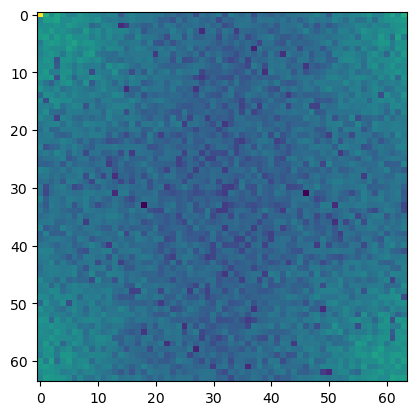

In [7]:
plt.imshow(np.abs(dft_log))

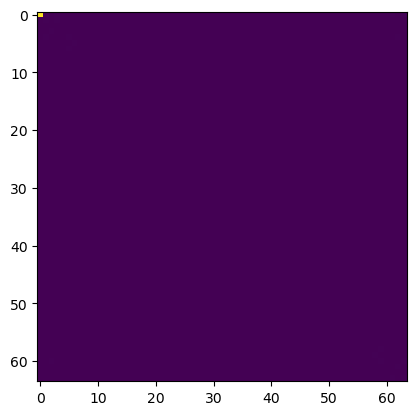

In [8]:
plt.imshow(np.abs(dft))

# IDFT for Gray Image

In [9]:
idft = np.empty_like(img_gray, dtype = np.complex_)

In [10]:
for i in range(N):
    for j in range(N):
        x = 0;
        for k in range(N):
            for l in range(N):
                x = x + dft[k,l]*np.exp(1j*np.pi*(i*k+j*l)*(1/N)*2)
        idft[i,j] = x/(N*N)

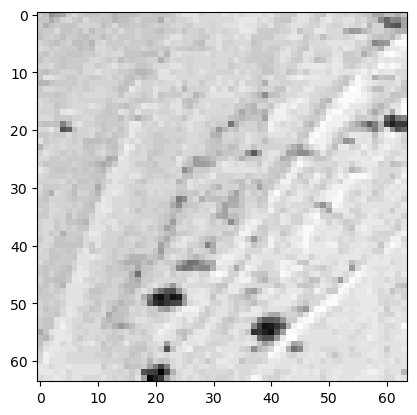

In [11]:
plt.imshow(abs(idft),'gray')

# DFT Using Matrix Multiplication

In [12]:
dft_matrix = np.empty_like(img_gray, dtype = np.complex_)
W = np.empty_like(img_gray, dtype = np.complex_)

In [13]:
for i in range(N):
    for j in range(N):
        W[i,j] = np.exp(-1j*np.pi*2*j*(1/N)*i)

In [14]:
W

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99518473-0.09801714j,
        0.98078528-0.19509032j, ..., 0.95694034+0.29028468j,
        0.98078528+0.19509032j, 0.99518473+0.09801714j],
       [1.        +0.j        , 0.98078528-0.19509032j,
        0.92387953-0.38268343j, ..., 0.83146961+0.55557023j,
        0.92387953+0.38268343j, 0.98078528+0.19509032j],
       ...,
       [1.        +0.j        , 0.95694034+0.29028468j,
        0.83146961+0.55557023j, ..., 0.63439328-0.77301045j,
        0.83146961-0.55557023j, 0.95694034-0.29028468j],
       [1.        +0.j        , 0.98078528+0.19509032j,
        0.92387953+0.38268343j, ..., 0.83146961-0.55557023j,
        0.92387953-0.38268343j, 0.98078528-0.19509032j],
       [1.        +0.j        , 0.99518473+0.09801714j,
        0.98078528+0.19509032j, ..., 0.95694034-0.29028468j,
 

In [15]:
def dft_matmul(img_gray):
    dft_matrix = np.matmul(W,img_gray)
    dft_matrix = np.matmul(dft_matrix,W.T)
    return dft_matrix
    
dft_matmul(img_gray)

array([[ 6.62972000e+05   +0.j        ,  1.75325436e+03+5336.29479305j,
        -7.71756559e+02 +704.0156337j , ...,
        -3.00826810e+03+1417.09814055j, -7.71756559e+02 -704.0156337j ,
         1.75325436e+03-5336.29479305j],
       [-4.76031636e+02 +542.25201353j, -2.19045568e+03+1640.28536619j,
         1.84137498e+03+1574.57163679j, ...,
        -1.49401182e+03 +602.92033237j,  1.11196665e+03+1446.33213177j,
         8.36989247e+02+2169.11710685j],
       [ 5.36104263e+02 -875.18807428j,  8.12989819e+02 +895.45786184j,
        -1.11693053e+03 -344.91545525j, ...,
        -4.86336338e+02-1178.50829646j,  1.43841369e+03 +381.54750983j,
        -1.18974020e+03+1023.03139342j],
       ...,
       [-1.06571632e+03-1445.67747084j, -2.28980714e+03 +837.60688106j,
         9.38461421e+01-1458.2255798j , ...,
         9.70577860e+02 -567.98119191j, -2.48889585e+02+2790.4394968j ,
        -9.54928780e+02 -828.55638125j],
       [ 5.36104263e+02 +875.18807428j, -1.18974020e+03-1023.0313934

# IDFT Using Matrix Multiplication

In [16]:
idft_matrix = np.empty_like(img_gray, dtype = np.complex_)
W_star = np.empty_like(img_gray, dtype = np.complex_)

In [17]:
for i in range(N):
    for j in range(N):
        W_star[i,j] = np.exp(1j*np.pi*2*j*(1/N)*i)

In [40]:
def idft_matmul(dft_matrix):
    idft_matrix = np.matmul(W_star,dft_matrix)
    idft_matrix = np.matmul(idft_matrix,W_star.T)
    idft_matrix = idft_matrix/(N**2)
    return idft_matrix
    
idft_matrix = idft_matmul(dft_matrix)

/var/folders/cm/r2jljkf13tgcjgnjw4dm_q300000gn/T/ipykernel_22419/722040791.py:2: RuntimeWarning: overflow encountered in matmul
  idft_matrix = np.matmul(W_star,dft_matrix)
/var/folders/cm/r2jljkf13tgcjgnjw4dm_q300000gn/T/ipykernel_22419/722040791.py:2: RuntimeWarning: invalid value encountered in matmul
  idft_matrix = np.matmul(W_star,dft_matrix)


# Log Compression

In [20]:
def log_compr(I):
    I_new = np.empty_like(img_gray)
    for i in range(N):
        for j in range(N):
            I_new[i,j] = np.log(1+abs(I[i,j]))
    return I_new

# Centered DFT

In [21]:
def center_dft(img_gray):
    new_dft_image = np.empty_like(img_gray)
    for i in range(N):
        for j in range(N):
            new_dft_image[i,j] = np.power(-1,(i+j))*img_gray[i,j]
    dft_image = dft_matmul(new_dft_image)
    return dft_image
    

In [22]:
center_dft(img_gray)

array([[ 5.24368000e+05  +0.j        , -4.27040243e+00+121.56512961j,
         1.32398588e+02  +3.50820483j, ...,
         8.13006264e+01  -7.67500981j,  1.32398588e+02  -3.50820483j,
        -4.27040242e+00-121.56512961j],
       [ 2.10747080e+00 +21.79178205j,  3.12782955e+01 -25.90846101j,
         5.30794390e+01 +57.27972099j, ...,
        -6.59947028e+01 -61.96935709j,  9.92561670e+01+138.75738608j,
        -1.00141948e+02-218.01711779j],
       [ 1.33091958e+01 +20.74881107j, -3.05135614e+01 +90.06722692j,
         1.98435177e+02  -7.29454435j, ...,
        -3.49273716e+02 +55.06311267j, -4.25006403e+01 -41.76937868j,
         1.61814393e+01 +13.1030682j ],
       ...,
       [-1.36181996e+02 -95.66058318j, -4.85057856e+01 +97.6958063j ,
         3.30097602e+01 +20.90129831j, ...,
         7.33897147e+01 -24.9647552j ,  8.72349365e+01+198.35857428j,
        -1.37294129e+01 +36.85489695j],
       [ 1.33091958e+01 -20.74881107j,  1.61814393e+01 -13.1030682j ,
        -4.25006403e+0

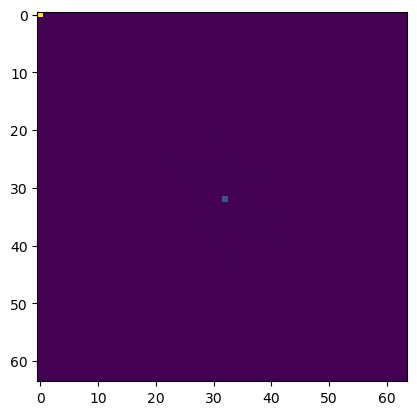

In [23]:
plt.imshow(abs(center_dft(img_gray)))

In [24]:
img1 = plt.imread("Downloads/7.1.03.tiff")
img1 = img1[:64,:64]


In [25]:
img2 = plt.imread("Downloads/7.1.02.tiff")
img2 = img2[:64,:64]


In [26]:
img3 = plt.imread("Downloads/7.1.04.tiff")
img3 = img3[:64,:64]

Image 1


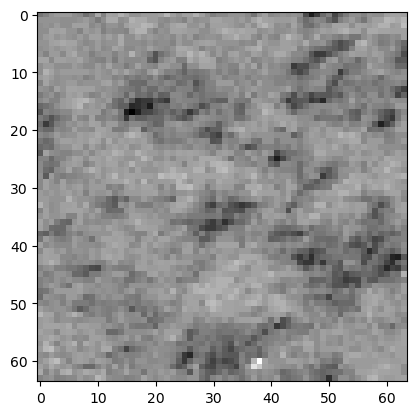

In [27]:
dft_img1 = dft_matmul(img1)
dft_img1_phase = np.angle(dft_img1)
idft_img1 = idft_matmul(dft_img1)
print('Image 1')
plt.imshow(img1,'gray')

Magnitude Plot For DFT Image 1


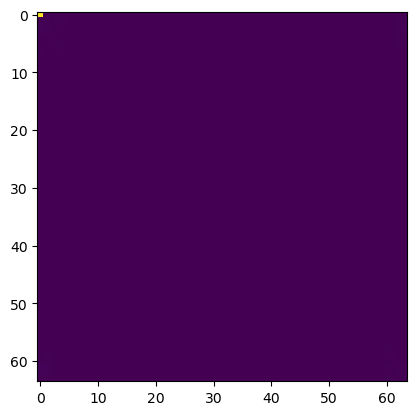

In [28]:
print('Magnitude Plot For DFT Image 1')
plt.imshow(abs(dft_img1))

Phase Plot For DFT Image 1


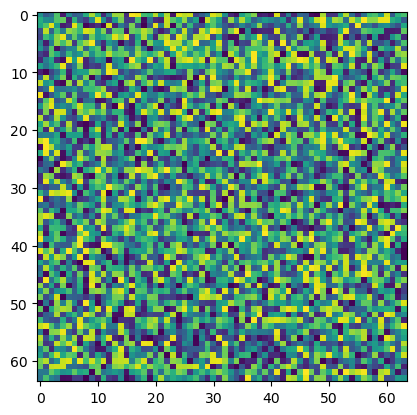

In [29]:
print('Phase Plot For DFT Image 1')
plt.imshow(dft_img1_phase)

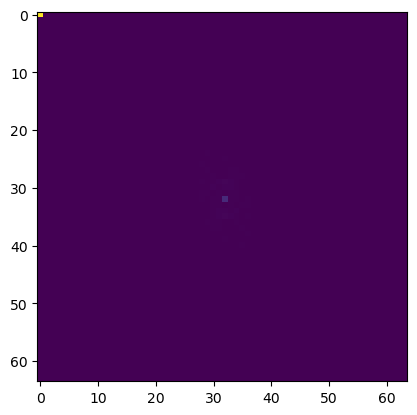

In [42]:
plt.imshow(abs(center_dft(img1)))

IDFT of Image 1


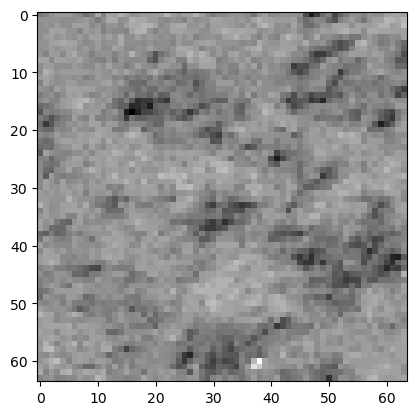

In [30]:
print('IDFT of Image 1')
plt.imshow(abs(idft_img1),'gray')

Image 2


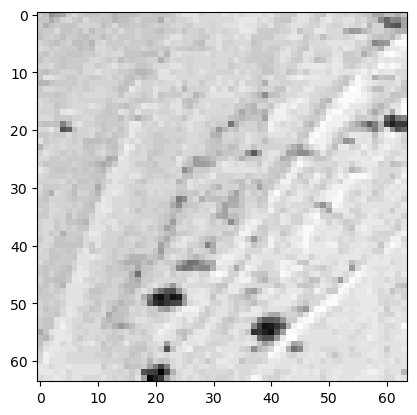

In [31]:
dft_img2 = dft_matmul(img2)
dft_img2_phase = np.angle(dft_img2)
idft_img2 = idft_matmul(dft_img2)
print('Image 2')
plt.imshow(img2,'gray')

Magnitude Plot For DFT Image 2


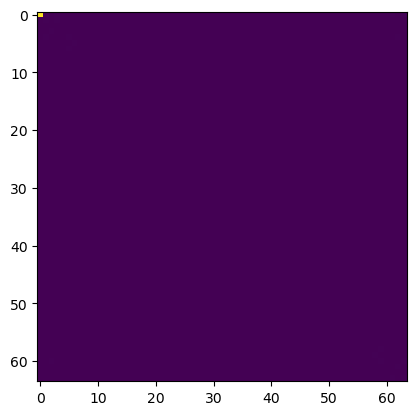

In [32]:
print('Magnitude Plot For DFT Image 2')
plt.imshow(abs(dft_img2))


Phase Plot For DFT Image 2


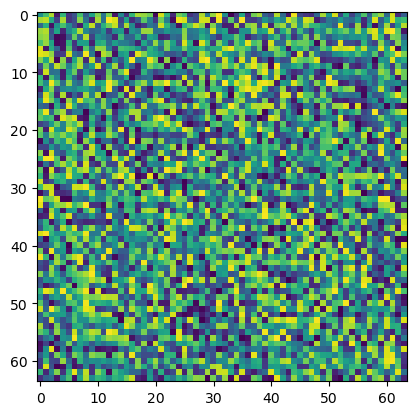

In [33]:
print('Phase Plot For DFT Image 2')
plt.imshow(dft_img2_phase)

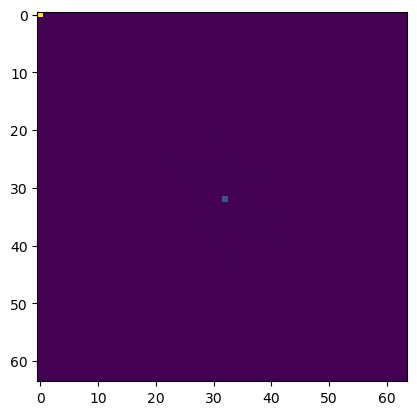

In [43]:
plt.imshow(abs(center_dft(img2)))

IDFT of Image 2


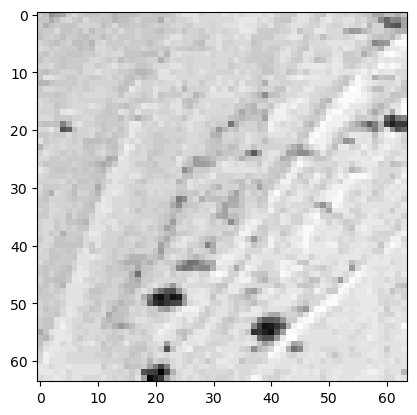

In [34]:
print('IDFT of Image 2')
plt.imshow(abs(idft_img2),'gray')

Image 3


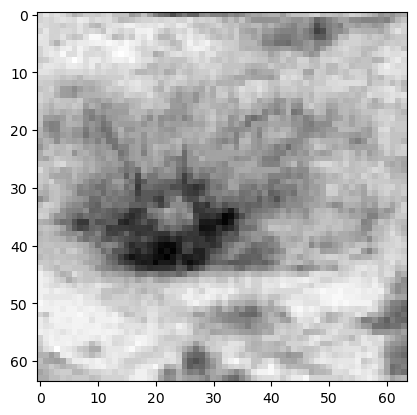

In [35]:
dft_img3 = dft_matmul(img3)
dft_img3_phase = np.angle(dft_img3)
idft_img3 = idft_matmul(dft_img3)
print('Image 3')
plt.imshow(img3,'gray')

Magnitude Plot For DFT Image 3


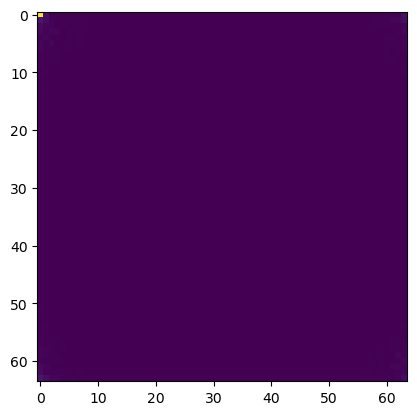

In [36]:
print('Magnitude Plot For DFT Image 3')
plt.imshow(abs(dft_img3))


Phase Plot For DFT Image 3


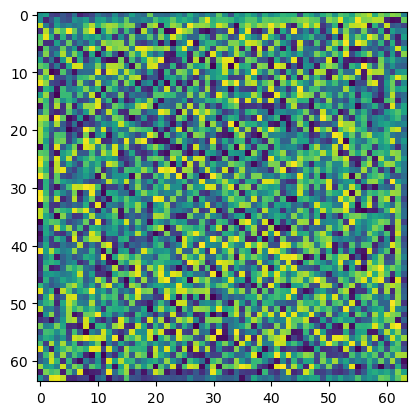

In [37]:
print('Phase Plot For DFT Image 3')
plt.imshow(dft_img3_phase)

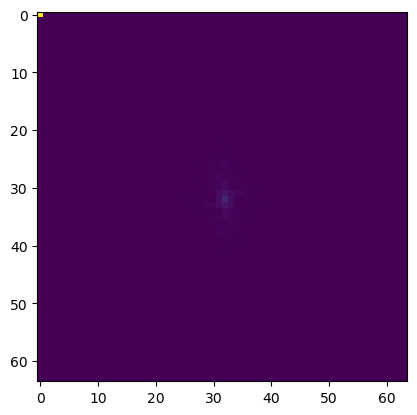

In [44]:
plt.imshow(abs(center_dft(img3)))

IDFT of Image 3


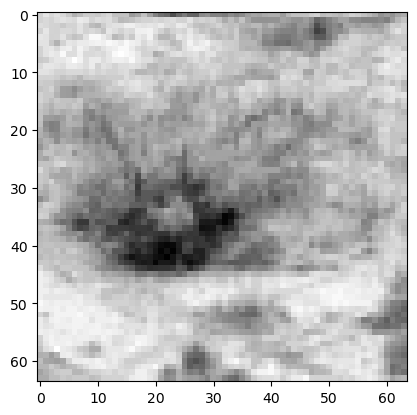

In [38]:
print('IDFT of Image 3')
plt.imshow(abs(idft_img3),'gray')

# Question 1

In [53]:
import matplotlib.image as mpimg
#Function for finding the histogram
def histogram(path):
    img = mpimg.imread(path)                    #Reading the image
    hist = {}                                   #Making a dictionary with key as pixel, value as frequency 
    for i in range(0,256):
        hist[i]=0                               #Initializing all to zero
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]]=hist[img[i][j]]+1  #Counting the pixel to a particular gray_level
    freq = list(hist.values())                 #Extracting frequencies from the dictionary
    pixels = list(hist.keys())                 #Extracting grey levels from the dictionary
    # print(freq,pixels)
    return freq,pixels
#Histogram of image
def ImageHist(path,binarize=True):
    img = mpimg.imread(path)                    #Image Reading
    #Plot
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.title("Image")
    plt.subplot(1,2,2)
    #Histogram Plot
    n,bins = histogram(path)
    # n,bins,_ = plt.hist(np.reshape(img,(-1,1)),bins = 256)
    plt.bar(bins,n)
    plt.title("Grey Level Image Histogram",fontweight="bold")
    plt.xlabel("Grey Levels")
    plt.ylabel("Frequency of Grey Level")
    plt.show()
    #Mode of the data
    max_val = max(n)
    mode = n.index(max_val)
    print("Modality of the histogram : "+str(mode))
    print("Frequency Count :"+str(n[mode]))
    return mode


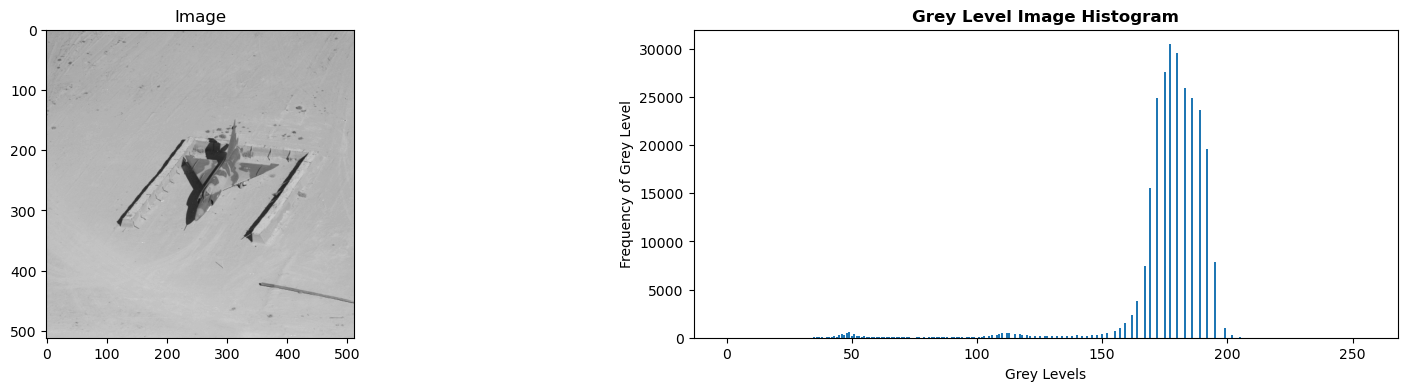

Modality of the histogram : 177
Frequency Count :30456


In [57]:
path = "Downloads/7.1.02.tiff"
img = ImageHist(path)


In [59]:
img_1_1 = plt.imread(path)

In [63]:
shape_img_1_1 = img_1_1.shape
M = shape_img_1_1[0]
N = shape_img_1_1[1]

In [101]:
def lin_point_oper(img,P,L):
    imgnew = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgnew[i,j] = int(P*img[i,j]+L)
            if imgnew[i,j]>255:
                imgnew[i,j]=255
            elif imgnew[i,j]<0:
                imgnew[i,j]=0
    return np.asarray(img1,dtype='int')

# I = P.I

In [80]:
im_2_1 = lin_point_oper(img_1_1,4,0)

# I = I + L

In [81]:
im_3_1 = lin_point_oper(img_1_1,0,20)

# I = P.I+L

In [82]:
im_4_1 = lin_point_oper(img_1_1,2,20)

In [83]:
def histogram(img):
    hist = np.zeros(256)                             #Initializing all to zero
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]]+=1  #Counting the pixel to a particular gray_level
    return hist

In [84]:
img_hist = histogram(img_1_1)
img1_hist = histogram(im_2_1)
img2_hist = histogram(im_3_1)
img3_hist = histogram(im_4_1)

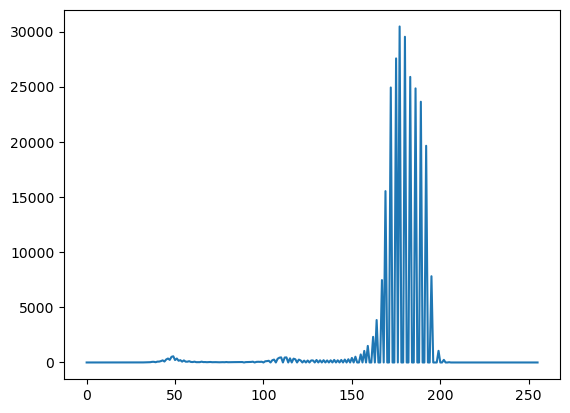

In [85]:
plt.plot(img_hist)

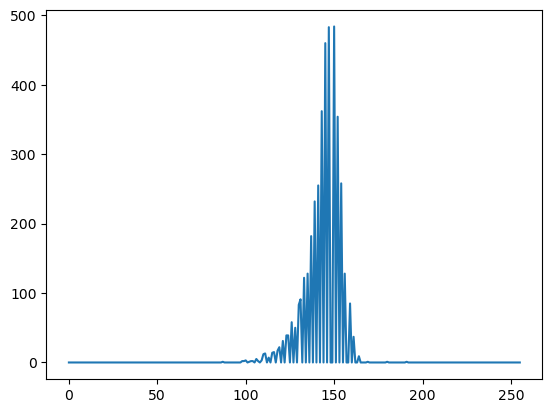

In [86]:
plt.plot(img1_hist)

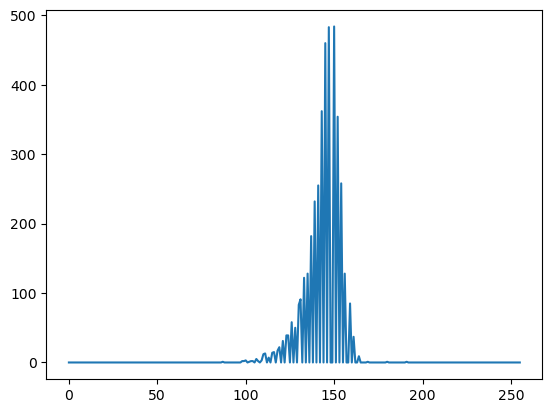

In [87]:
plt.plot(img2_hist)

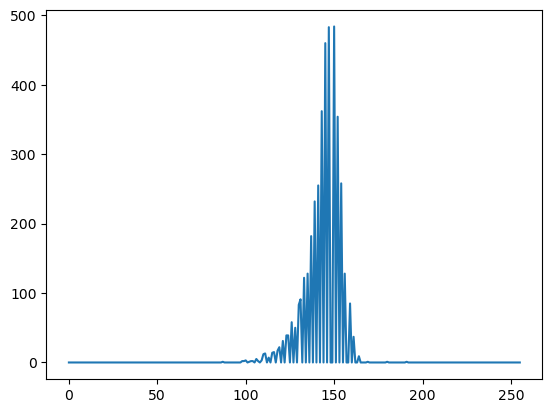

In [88]:
plt.plot(img3_hist)

# FCFS

In [106]:
def fcfs(img):
    img_max = img.max()
    img_min = img.min()
    P = 255/(img_max - img_min)
    L = -1*img_min*(P)
    img1 = lin_point_oper(img,P,L)
    return img1

In [110]:
img_fcfs_1 = fcfs(im_2_1)
print("Highest Pixel Value in Image is",img_fcfs_1.max())
print("Lowest Pixel Value in Image is",img_fcfs_1.min())

Highest Pixel Value in Image is 191
Lowest Pixel Value in Image is 87


In [112]:
img_fcfs_2 = fcfs(im_3_1)
print("Highest Pixel Value in Image is",img_fcfs_2.max())
print("Lowest Pixel Value in Image is",img_fcfs_2.min())

Highest Pixel Value in Image is 191
Lowest Pixel Value in Image is 87


In [113]:
img_fcfs_3 = fcfs(im_4_1)
print("Highest Pixel Value in Image is",img_fcfs_3.max())
print("Lowest Pixel Value in Image is",img_fcfs_3.min())

Highest Pixel Value in Image is 191
Lowest Pixel Value in Image is 87
